# Exercice 2 : la courbe de Von Koch 



L'objectif de cet exercice est de vous faire coder l'une des fractales les plus célèbres : la courbe de Von Koch, qui vous a été présenté la première semaine dans les exercices, et de vous faire observer, l'autosimilarité de cet objet.

 

Une brève illustration des trois premières itérations de la courbe :


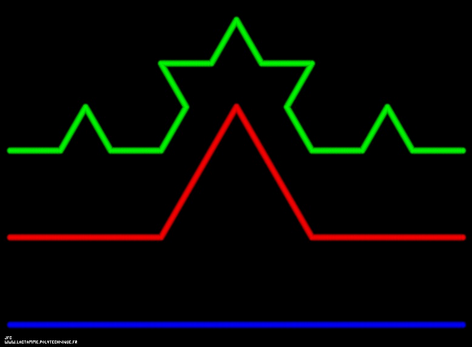

La totalité de l'exercice se fera dans ce notebook.

## Fonctionnement de l'algorithme

Afin de tracer la fractale vous allez suivre l'algorithme suivant :

Cet algorithme utilisera donc une fonction récursive, c'est-à-dire une fonction qui fait appel à elle même. Nous aborderons ce point plus en détail au moment de coder celle-ci.

 ## 1- Initialisation du programme


Importez tout d'abord les librairies nécessaires.

In [ ]:
# On commence par importer le module matplotlib qui nous 
# permettra de tracer la figure et le module time qui 
# nous permettra de mesurer le temps.
import matplotlib.pyplot as plt
import time
from numpy import sqrt

Définissez le nombre d'itérations et calculez le nombre de segments et de sommets de la courbe qui en découlent. On rappelle qu'en python $x^n$ s'écrit x**n

In [ ]:
# On fixe le nombre d'itérations que l'on souhaite obtenir. 
# Ce nombre d'itérations doit être positif
nombre_iterations = 3

# On en déduit le nombre de segments de la fractale 
nombre_segments = ...

# On en déduit le nombre de sommets 
nombre_sommets = nombre_segments + 1

Vous stockerez les positions des sommets sous la forme de deux tableaux :
- un tableau contenant tous les abscisses
- un tableau contenant toutes les ordonnées

la position dans le tableau définissant à quel sommet appartient la coordonnée. Les sommets se succéderont dans l'ordre du tracé.

Il vous faut donc créer ces tableaux.

In [ ]:
abscisses_tab = ...
ordonnees_tab = ...

Il vous faut désormais placer les deux extremités de la courbe.

In [ ]:
# première extrémité
abscisses_tab[0] = ...
ordonnees_tab[0] = ...

# deuxième extrémité
abscisses_tab[-1] = ...
ordonnees_tab[-1] = ...

Il ne reste plus qu'à fixer l'angle de la pointe de la courbe et le rapport d'homothétie entre une itération et la précédente. Pour la courbe de Von Koch, ils sont les suivants.

In [ ]:
angle = pi / 6
rapport = 3

## 2- Coeur du programme

Vous allez maintenant pas à pas définir la fonction placer_sommets qui constituera le coeur du programme. 
Voici ses spécifications :

On se placera dans un premier temps uniquement dans le cas où |indice2 - indice1| = 4, c'est-à-dire qu'il y a exactement trois sommets à placer entre les deux sommets considérés. Il s'agit donc de la dernière itération de la courbe.

Regardons comment placer les points à l'aide de la figure ci-dessous.

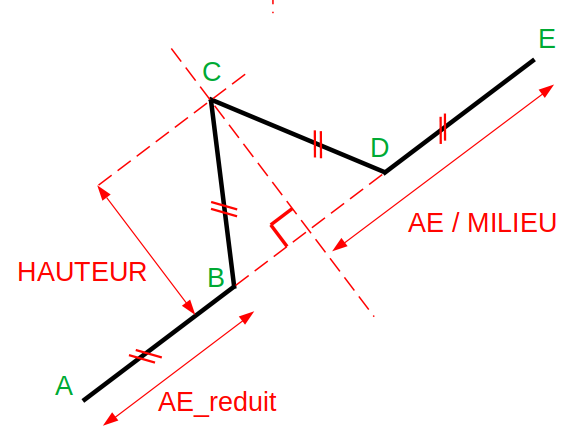

Le premier et le troisième point sont faciles à placer. Ils se situent sur l'axe entre les deux extrémité divisant le segment en rapport sous-segments de même longueur.

Pour le deuxième point, il se trouve à mi-chemin entre les deux segments mais décalé de HAUTEUR orthogonalement au segment. HAUTEUR se calcule de la façon suivante :

HAUTEUR = sin(angle)/rapport

Ainsi, les coordonnées des points B, C, C', et D sont les suivantes :

$(B_x, B_y) = (A_x + AE_x\_reduit, A_y + AE_y\_reduit) $

$(C'_x, C'_y) = (Ax + (AE / MILIEU)_x, A_t + (AE / MILIEU)_y)$

$(C_x, C_y) = (C'_x + HAUTEUR_x , C'_y + HAUTEUR_y)$ 

$(D_x, D_y) = (E_x - AEx\_reduit, E_y - AEy\_reduit) $

Remplissez maintenant la fonction placer_sommet en vous aidant de ces formules. Vous noterez que celles-ci ne sont plus valide si les coordonnées de A et E sont échangées (cela retourne le triangle). Il faudra donc s'assurer que indice1 < indice2.

À toutes fins utiles, nous rappellons que les fonctions sin et le nombre pi sont importés de la bibliothèque numpy.

In [ ]:
def placer_sommets(indice1, indice2, angle, rapport) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscisses_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von Koch.
    angle est un flottant et est exprimé en radians.
    rapport est un entier indiquant le rapport d'omothétie entre deux itérations
    successives (pour la courbe de Von Koch il vaut 3).

    
    Remplit les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscisses_tab et ordonnees_tab en respectant l'angle angle.
    
    Ne renvoie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscisses_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscisses_tab))
    assert(indice2 >= 0 and indice2 < len(abscisses_tab))
    
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien trois.
    assert((indice2 - indice1 - 1) == 3)
    
    
    # À remplir
    

Testez votre fonction.

In [ ]:
indice1 = ...
indice2 = ...
abscisses_tab[indice1] = ...
ordonnees_tab[indice1] = ...
abscisses_tab[indice2] = ...
ordonnees_tab[indice2] = ...

placer_sommets(indice1, indice2)
print("abscisses : ", abscisses_tab)
print("ordonnees :", ordonnees_tab)

#### Il vous faut maintenant prendre en compte les autres cas de figure.
Copier ce que vous avez fait dans la cellule ci-dessous et modifier si besoin est votre code pour que la fonction effectue une itération même si |indice2 - indice1| > 3. Lorsqu'elle effectue une itération, elle ne renseigne que les coordonnées des trois sommets calculés.

In [ ]:
def placer_sommets(indice1, indice2, angle, rapport) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscisses_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von Koch.
    angle est un flottant et est exprimé en radians.
    rapport est un entier indiquant le rapport d'omothétie entre deux itérations
    successives (pour la courbe de Von Koch il vaut 3).

    
    Remplit les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscisses_tab et ordonnees_tab en respectant l'angle angle.
    
    Ne renvoie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscisses_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscisses_tab))
    assert(indice2 >= 0 and indice2 < len(abscisses_tab))
    
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien divisible par trois (en toute rigeur il doit être 
    # une puissance de trois).
    assert((indice2 - indice1 - 1) % 3 == 0)
    
    
    # À remplir
    

Tester de nouveau votre fonction dans le cas où indice2 - indice1 > 4 et dans le cas où indice2 - indice1 = 4. N'oubliez pas que abscisses_tab et ordonnees_tab ont déjà été modifié. Si besoin, vous pouvez les réinitialiser.

In [ ]:
#-------Initialisation des variables-------
abscisses_tab = ...
ordonnees_tab = ...
# première extrémité
abscisses_tab[0] = ...
ordonnees_tab[0] = ...
# deuxième extrémité
abscisses_tab[-1] = ...
ordonnees_tab[-1] = ...

# indices
indice1 = ...
indice2 = ...
abscisses_tab[indice1] = ...
ordonnees_tab[indice1] = ...
abscisses_tab[indice2] = ...
ordonnees_tab[indice2] = ...

indice1bis = ...
indice2bis = ...
abscisses_tab[indice1bis] = ...
ordonnees_tab[indice1bis] = ...
abscisses_tab[indice2bis] = ...
ordonnees_tab[indice2bis] = ...

#-----------------Calculs--------------
placer_sommets(indice1, indice2, angle, rapport)
print("abscisses premier test : ", abscisses_tab)
print("ordonnees premier test :", ordonnees_tab)
placer_sommets(indice1bis, indice2bis, angle, rapport)
print("abscisses premier test : ", abscisses_tab)
print("ordonnees premier test :", ordonnees_tab)

Il vous faut maintenant traiter les sommets éventuels situés entre indice1 et indice2. Il vous faudra pour cela appeler placer_sommets au sein de cette même fonction. C'est ce que l'on appelle la récursivité.

Plus précisément, vous aurez besoin d'appeler placer_sommets uniquement si |indice2 - indice1| > 4 car sinon c'est que le nombre maximal d'itérations a été atteint.

Si vous devez faire appel à placer_sommets, combien de couples de sommets sont concernés ?

Recopier ce que vous avez déjà codé pour finir de remplir la fontion placer_sommets. 

ATTENTION : ne donner à placer_sommets que des arguments de type int. Pour transformer un flottant en entier, il vous faut utiliser la fonction int qui prend en argument un flottant et renvoie un entier. Pour plus de précision utiliser la fonction help.

In [ ]:
def placer_sommets(indice1, indice2, angle, rapport) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscisses_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von Koch.
    angle est un flottant et est exprimé en radians.
    rapport est un entier indiquant le rapport d'omothétie entre deux itérations
    successives (pour la courbe de Von Koch il vaut 3).

    
    Remplit les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscisses_tab et ordonnees_tab en respectant l'angle angle.
    
    Ne renvoie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscisses_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscisses_tab))
    assert(indice2 >= 0 and indice2 < len(abscisses_tab))
    
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien divisible par trois (en toute rigeur il doit être 
    # une puissance de trois).
    assert((indice2 - indice1 - 1) % 3 == 0)
    
    
    # À remplir
    

Testez de nouveau votre fonction dans des cas différents.

In [ ]:
#-------Initialisation des variables-------
abscisses_tab = ...
ordonnees_tab = ...
# première extrémité
abscisses_tab[0] = ...
ordonnees_tab[0] = ...
# deuxième extrémité
abscisses_tab[-1] = ...
ordonnees_tab[-1] = ...


#-----------------Calculs--------------
placer_sommets(indice1, indice2, angle, rapport)
print("abscisses premier test : ", abscisses_tab)
print("ordonnees premier test :", ordonnees_tab)
placer_sommets(indice1bis, indice2bis, angle, rapport)
print("abscisses premier test : ", abscisses_tab)
print("ordonnees premier test :", ordonnees_tab)

## 3- Affichage

Il vous faut désormais afficher le résultat obtenu ! Vous utiliserez pour cela la fonction plot de matplotlib.pyplot.

In [ ]:
#-------Initialisation des variables-------
abscisses_tab = ...
ordonnees_tab = ...
# première extrémité
abscisses_tab[0] = ...
ordonnees_tab[0] = ...
# deuxième extrémité
abscisses_tab[-1] = ...
ordonnees_tab[-1] = ...

#-----------------Calculs------------------
placer_sommets(...)


#-----------------Affichage----------------
# Nettoyage d'un tracé éventuel
plt.clf()
# tracé
plt.plot(abscisses_tab, ordonnees_tab)
# paramétrisation des axes 
plt.axis('equal')
# titre
plt.title("Courbe de Von Koch")
# affichage de la figure obtenue
plt.show()

## 4- Évaluation du temps de calcul

Avant de partir, penchez-vous sur le temps nécessaire pour calculer cette courbe. Nous avons ajouté de quoi mesurer et afficher le temps de calcul mis pour placer les sommets de la courbe.

Changez le nombre d'itérations et regardez comment le temps varie en fonction de celui-ci. À votre avis, cette évolution est-elle linéaire ? quadratique (c’est-à-dire proportionnelle au carré du nombre d’itérations) ? exponentielle ? 

In [ ]:
#-------Initialisation des variables-------

# On fixe le nombre d'itérations que l'on souhaite obtenir. 
# Ce nombre d'itérations doit être positif
nombre_iterations = 3

# On en déduit le nombre de segments de la fractale 
nombre_segments = ...

# On en déduit le nombre de sommets 
nombre_sommets = nombre_segments + 1
abscisses_tab = ...
ordonnees_tab = ...

# première extrémité
abscisses_tab[0] = ...
ordonnees_tab[0] = ...

# deuxième extrémité
abscisses_tab[-1] = ...
ordonnees_tab[-1] = ...

#-----------------Calculs------------------
debut = time.time()
placer_sommets(...)
fin = time.time()
print("temps de calcul :", fin - debut)

#-----------------Affichage----------------
# Nettoyage d'un tracé éventuel
plt.clf()
# tracé
plt.plot(abscisses_tab, ordonnees_tab)
# paramétrisation des axes 
plt.axis('equal')
# titre
plt.title("Courbe de Von Koch")
# affichage de la figure obtenue
plt.show()